In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
# File to Load
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"

In [4]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_df = pd.read_csv(mouse_drug_data)
clinical_trial_data_df = pd.read_csv(clinical_trial_data)

In [5]:
# Combine the data into a single dataset
dataset_df = pd.merge(mouse_drug_data_df, clinical_trial_data_df, on="Mouse ID")

In [6]:
# Display the data table for preview
dataset_df

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


In [7]:
# === Tumor Response to Treatment ===
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_dataset = dataset_df.groupby(['Drug','Timepoint'])

In [8]:
# Convert to DataFrame
tumor_response_df = pd.DataFrame(grouped_dataset['Tumor Volume (mm3)'].mean())
tumor_response_reset_df = tumor_response_df.reset_index()

In [9]:
# Preview DataFrame
tumor_response_reset_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [10]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volumes_sem_df = pd.DataFrame(grouped_dataset['Tumor Volume (mm3)'].sem())

In [11]:
# Convert to DataFrame
tumor_volumes_sem_df = pd.DataFrame(grouped_dataset['Tumor Volume (mm3)'].sem())

In [12]:
# Preview DataFrame
tumor_volumes_sem_reset_df = tumor_volumes_sem_df.reset_index()
tumor_volumes_sem_reset_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [13]:
# Minor Data Munging to Re-Format the Data Frames
tumor_response_pivot_df = tumor_response_reset_df.pivot_table('Tumor Volume (mm3)', ['Timepoint'], 'Drug')

In [14]:
# Preview that Reformatting worked
tumor_response_pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [15]:
# Set x axis
days = tumor_response_pivot_df.index.tolist()

In [16]:
# Set y axis values
capomulin_val = tumor_response_pivot_df["Capomulin"].tolist()
infubinol_val = tumor_response_pivot_df["Infubinol"].tolist()
ketapril_val = tumor_response_pivot_df["Ketapril"].tolist()
placebo_val = tumor_response_pivot_df["Placebo"].tolist()

In [17]:
# Get DataFrame with Standard Errors
tumor_volumes_pivot_df = tumor_volumes_sem_reset_df.pivot_table('Tumor Volume (mm3)', ['Timepoint'], 'Drug')
capomulin_err = tumor_volumes_pivot_df["Capomulin"].tolist()
infubinol_err = tumor_volumes_pivot_df["Infubinol"].tolist()
ketapril_err = tumor_volumes_pivot_df["Ketapril"].tolist()
placebo_err = tumor_volumes_pivot_df["Placebo"].tolist()

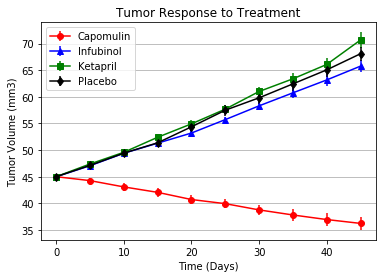

In [18]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
capomulin = ax.errorbar(days, capomulin_val, capomulin_err, marker='o', color="red", label="Capomulin")
infubinol = ax.errorbar(days, infubinol_val, infubinol_err, marker='^', color="blue", label="Infubinol")
ketapril = ax.errorbar(days, ketapril_val, ketapril_err, marker='s', color="green", label="Ketapril")
placebo = ax.errorbar(days, placebo_val, placebo_err, marker='d', color="black", label="Placebo") 
ax.set_title("Tumor Response to Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.grid(axis='y')

# Create a legend for our chart
plt.legend(handles=[capomulin, infubinol, ketapril, placebo], loc="best")

In [19]:
# Save the Figure
fig.savefig("Tumor_Response_to_Treatment.jpg")

In [20]:
# Show the Figure
plt.show()

In [21]:
# === Metastatic Response to Treatment ===
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
grouped_dataset = dataset_df.groupby(['Drug','Timepoint'])

In [22]:
# Convert to DataFrame
metastatic_sites_df = pd.DataFrame(grouped_dataset['Metastatic Sites'].mean())

In [23]:
# Preview DataFrame 
metastatic_sites_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [24]:
# Munge it
metastatic_sites_reset_df = metastatic_sites_df.reset_index()
metastatic_sites_pivot_df = metastatic_sites_reset_df.pivot_table('Metastatic Sites', ['Timepoint'], 'Drug')

In [25]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint and Convert to Dataframe
metastatic_sites_sem_df = pd.DataFrame(grouped_dataset['Metastatic Sites'].sem())

In [26]:
# Preview DataFrame
metastatic_sites_sem_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
...                               ...
Zoniferol 25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [27]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_sites_sem_reset_df = metastatic_sites_sem_df.reset_index()
metastatic_sites_sem_pivot_df = metastatic_sites_sem_reset_df.pivot_table('Metastatic Sites', ['Timepoint'], 'Drug')

In [28]:
# Preview that Reformatting worked
metastatic_sites_sem_pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [29]:
# Set x axis
days = metastatic_sites_sem_pivot_df.index.tolist()

In [30]:
# Set y axis values
capomulin_val = metastatic_sites_pivot_df["Capomulin"].tolist()
infubinol_val = metastatic_sites_pivot_df["Infubinol"].tolist()
ketapril_val = metastatic_sites_pivot_df["Ketapril"].tolist()
placebo_val = metastatic_sites_pivot_df["Placebo"].tolist()

In [31]:
# Get DataFrame with Standard Errors
capomulin_err = metastatic_sites_sem_pivot_df["Capomulin"].tolist()
infubinol_err = metastatic_sites_sem_pivot_df["Infubinol"].tolist()
ketapril_err = metastatic_sites_sem_pivot_df["Ketapril"].tolist()
placebo_err = metastatic_sites_sem_pivot_df["Placebo"].tolist()

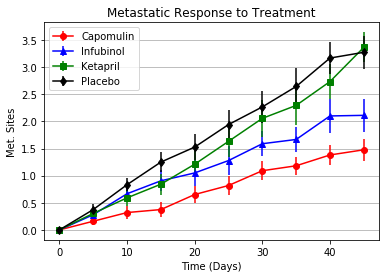

In [32]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
capomulin = ax.errorbar(days, capomulin_val, capomulin_err, marker='o', color="red", label="Capomulin")
infubinol = ax.errorbar(days, infubinol_val, infubinol_err, marker='^', color="blue", label="Infubinol")
ketapril = ax.errorbar(days, ketapril_val, ketapril_err, marker='s', color="green", label="Ketapril")
placebo = ax.errorbar(days, placebo_val, placebo_err, marker='d', color="black", label="Placebo") 
ax.set_title("Metastatic Response to Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Met. Sites")
ax.grid(axis='y')

# Create a legend for our chart
plt.legend(handles=[capomulin, infubinol, ketapril, placebo], loc="upper left")

In [33]:
# Save the Figure
fig.savefig("Metastatic Response to Treatment.jpg")

In [34]:
# Show the Figure
plt.show()

In [35]:
# === Survival Rates ===
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
grouped_dataset = dataset_df.groupby(['Drug','Timepoint'])

In [36]:
# Convert to DataFrame
mice_df = pd.DataFrame(grouped_dataset['Mouse ID'].count())

In [37]:
# Preview DataFrame
mice_df

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23
...                       ...
Zoniferol 25               16
          30               15
          35               14
          40               14
          45               14

[100 rows x 1 columns]

In [38]:
# Minor Data Munging to Re-Format the Data Frames
mice_reset_df = mice_df.reset_index()
mice_pivot_df = mice_reset_df.pivot_table('Mouse ID', ['Timepoint'], 'Drug')

In [39]:
# Preview DataFrame
mice_pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [40]:
# Set x axis
days = mice_pivot_df.index.tolist()

In [41]:
capomulin_val = mice_pivot_df["Capomulin"].tolist() 
mice_max = capomulin_val[0]
capomulin_val = [x/mice_max * 100 for x in capomulin_val]
infubinol_val = mice_pivot_df["Infubinol"].tolist()
mice_max = infubinol_val[0]
infubinol_val = [x/mice_max * 100  for x in infubinol_val]
ketapril_val = mice_pivot_df["Ketapril"].tolist()
mice_max = ketapril_val[0]
ketapril_val = [x/mice_max * 100 for x in ketapril_val]
placebo_val = mice_pivot_df["Placebo"].tolist()
mice_max = placebo_val[0]
placebo_val = [x/mice_max * 100 for x in placebo_val]

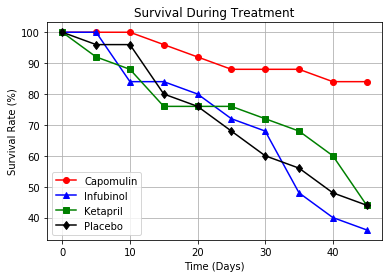

In [42]:
# Generate the Plot (Accounting for percentages)
fig, ax = plt.subplots()
capomulin, = ax.plot(days, capomulin_val, marker='o', color="red", label="Capomulin")
infubinol, = ax.plot(days, infubinol_val, marker='^', color="blue", label="Infubinol")
ketapril, = ax.plot(days, ketapril_val, marker='s', color="green", label="Ketapril")
placebo, = ax.plot(days, placebo_val, marker='d', color="black", label="Placebo") 
ax.set_title("Survival During Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
ax.grid()

# Create a legend for our chart
plt.legend(handles=[capomulin, infubinol, ketapril, placebo], loc="best")

In [43]:
# Save the Figure
fig.savefig("Survival During Treatment.jpg")

In [44]:
# Show the Figure
plt.show()

In [45]:
# === Summary Bar Graph === aka Tumor Change Over 45 Day Treatment
# Calculate the percent changes for each drug

summary_drug = []
summary_change = []
summary_dict = {}
bar_drug = []
bar_change = []

for (col, data) in tumor_response_pivot_df.iteritems():
    first = data.values[0]
    last = data.values[-1]
    change = ((last - first) / first) * 100
    summary_drug.append(col)
    summary_change.append(change)
    summary_dict[col] = change
    if col in ["Capomulin", "Infubinol", "Ketapril", "Placebo"]:
        bar_drug.append(col)
        bar_change.append(change)

summary_df = pd.DataFrame(list(summary_dict.items()))
summary_df = summary_df.rename(columns={0:"Drug", 1:"% Change"})


In [46]:
# Display the data to confirm
print ("Drug")
for i in range(10):
    print(f"{summary_drug[i]} \t{round(summary_change[i],6)}")

Drug
Capomulin 	-19.475303
Ceftamin 	42.516492
Infubinol 	46.123472
Ketapril 	57.028795
Naftisol 	53.923347
Placebo 	51.29796
Propriva 	47.241175
Ramicane 	-22.3209
Stelasyn 	52.085134
Zoniferol 	46.579751


In [47]:
def autolabel(ax):
    for patch in ax.patches:
        bl = patch.get_xy()
        x = 0.5 * patch.get_width() + bl[0]
        if patch.get_height() < 0:
            y = -5
        else:
            y = 5
        ax.text(x,y,"%d%%" %(patch.get_height()),
            ha='center', rotation='horizontal', color = 'w', weight = 'bold')

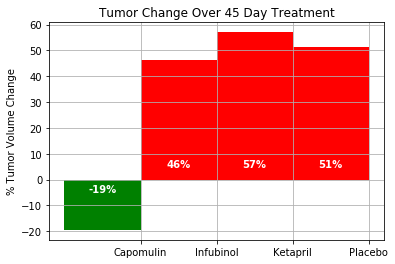

In [48]:
# Orient widths. Add labels, tick marks, etc. 

fig, ax = plt.subplots()
rects1 = ax.bar(bar_drug[0], bar_change[0], color = "g", width = -1, align = "edge", label=bar_change[0])
rects2 = ax.bar(bar_drug[1], bar_change[1], color = "r", width = -1, align = "edge", label=bar_change[1])
rects3 = ax.bar(bar_drug[2], bar_change[2], color = "r", width = -1, align = "edge", label=bar_change[2])
rects4 = ax.bar(bar_drug[3], bar_change[3], color = "r", width = -1, align = "edge", label=bar_change[3])
ax.grid()
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(bar_drug)
# Call function to implement the function call
autolabel(ax)

In [49]:
# Save the Figure
fig.savefig("Tumor Change Over 45 Day Treatment.jpg")

In [50]:
# Show the Figure
plt.show()